# EP1 - Giovanna Louzi Bellonia

### Método simples de calibração da câmera

Para esse primeiro método de calibração foi necessário um objeto plano e retangular (no caso um livro) e de uma régua. Foi medido a altura ($d_Y$) e largura ($d_X$) do objeto, resultando em 246mm e 173mm respectivamente. 
O celular (com a câmera) foi posicionado de forma que o centro do livro ficasse no centro da imagem e que seus lados paralelos permanecessem paralelos na imagem, ou seja, celular e livro estavam paralelos um ao outro na hora da foto. Foi anotada a distância ($d_Z$) do objeto à câmera que foi igual a 335mm. 

(4032, 3024)

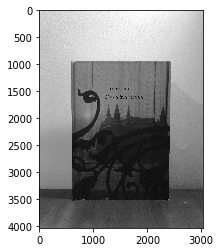

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#salvando o valor das distancias nas variaveis
d_Y = 246
d_X = 173
d_Z = 335

#printando a imagem do livro
img = cv2.imread('./imgs/IMG_1.JPG',0) # reads image as grayscale
plt.imshow(img, cmap='gray')
img.shape

Pelo img.shape temos a resolução da img que é igual a 4032 x 3024.

Para encontrar os valores de altura e largura do livro na imagem, ela foi cortada de forma a ter apenas o livro presente na sub_img e sem partes dele faltando. Os números que aparecem junto com o plot a cima permitiram que fosse mais fácil chutar valores aproximados para a posição inicial do livro em x e y da imagem original e a encontrar a altura e largura aproximada. Aos poucos, modificando esses valores, já próximos, foi possível encontrar um valor mais certeiro.

(2600, 1830)

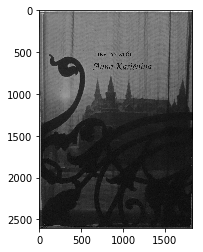

In [2]:
#valores p/ posicao inicial do livro em y na img original, altura, posicao inicial em x na img original e largura
y = 929 
h = 2600
x = 585
w = 1830
sub_img = img[y:y+h, x:x+w]
plt.imshow(sub_img, cmap='gray')
sub_img.shape

Com isso obtivemos que a altura h do objeto na imagem é 2600px e que a largura w do objeto na imagem é 1830px.

Temos que a distância focal $f_x = \frac{w*d_Z}{d_X}$ e $f_y = \frac{h*d_Z}{d_Y}$, logo, encontramos os valores de fx e fy como 3544 e 3541 respectivamente.

In [3]:
fx = (w*d_Z)/d_X
fy = (h*d_Z)/d_Y
print ("fx, fy =", (fx, fy))

fx, fy = (3543.64161849711, 3540.650406504065)


### Calibração de câmera utilizando calibration toolbox pro Matlab
Foi baixado as ferramentas de calibração encontradas em http://www.vision.caltech.edu/bouguetj/calib_doc/ e de acordo com as especificações foi feita a calibração da camera.

Primeiramente foram tiradas 13 fotos de angulos diferentes de um plano quadriculado. Como exemplo essas duas abaixo:
<p>
    <img align="left" width=300 src="imgs/check_board/IMG_1.JPG"/>
    <img align="middle" width=300 src="imgs/check_board/IMG_2.JPG"/>
</p>

Essas imagens foram então colocadas em escalas de cinza para facilitar a seleção dos quadrados. A seleção foi feita de acordo com as indicações do calib, selecionando 4 pontos na imagem que identificam 4 pontos pré-determinados no plano real.
<p> 
    <img align="left" width=400 src="imgs/selection1.jpg"/>
    <img align="middle" width=400 src="imgs/selection2.jpg"/>
</p>

Depois que todas as imagens já tem seus pontos selecionados, as funções do calib retornam resultados sobre a câmera:
<p>
    <img align="middle" width=1000 src="imgs/result_values.jpg" />
</p>

Além disso é calculado em quais posições a câmera estava quando cada foto foi tirada:
<p> 
    <img align="left" width=400 src="imgs/result_camera1.jpg"/>
    <img width=400 src="imgs/result_camera2.jpg"/>
</p>

### Conclusões
A distância focal encontrada pelo primeiro método foi próximo de 3543 e 3540, enquanto o encontrado pelo segundo método foi perto de 3352 e 3343. Esse valores se distanciam um pouco uns dos outros porque o primeiro é encontrado de uma forma muito mais grosseira, com muitas variáveis passíveis de erro, como a análise das distâncias utilizando a régua ou o fato de o livro provavelmente não estar realmente centralizado e paralelo. 

O valor da imagem do livro possui as seguintes informações:
<p>
    <img align="middle" width=490 src="imgs/info_camera.jpg"/>
</p>

É perceptivel uma diferença nos valores encontrados pelos métodos anterio 

In [4]:
cols = (4032*w*d_Z)/(d_X*3.99)
cols

3580943.109218132

In [5]:
(4032*3352)/(12.2*3024)

366.3387978142077